Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").



In [29]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.offline import iplot


In [13]:
df_ca = pd.read_csv('ca_c_f_d.csv')

In [15]:
df_ca.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


In [149]:
df_ca['Data'] = pd.to_datetime(df_ca['Data'], format='%Y-%m-%d') # fixing issue with date format


In [151]:
df_kgh = pd.read_csv('kgh_d.csv')
df_kgh['Data'] = pd.to_datetime(df_kgh['Data'], format='%Y-%m-%d')

In [169]:
# remane kolumn dla poznijszego merge
df_ca = df_ca.rename(columns={'Zamkniecie':'Zamkniecie_Ca'})
df_kgh = df_kgh.rename(columns={'Zamkniecie':'Zamkniecie_kgh'})

In [119]:
df_kgh.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [129]:
fig1 = go.Figure()

In [131]:
fig2 = go.Figure()

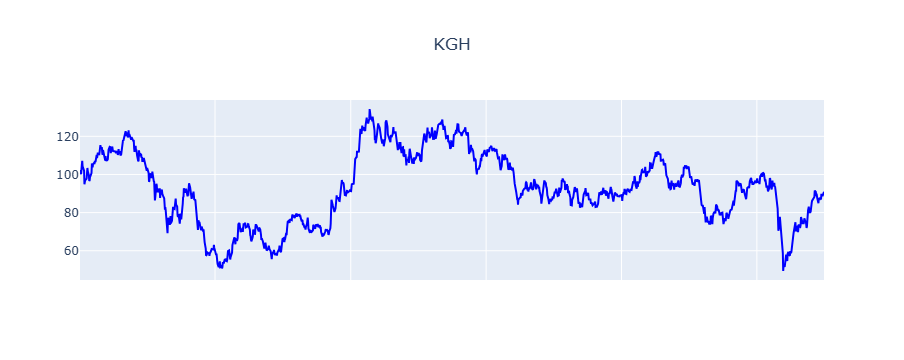

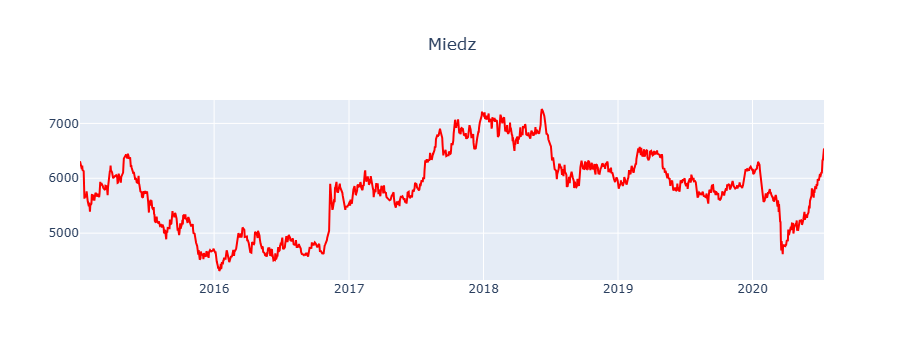

In [135]:
fig1.add_trace(go.Scatter(x=df_kgh['Data'],y=df_kgh['Zamkniecie_kgh'],name='KGH', line=dict(color='blue')))
fig1.update_layout(title={'text': 'KGH', 'x': 0.5, 'xanchor': 'center'}, xaxis=dict(showticklabels=False),
    showlegend=False)
iplot(fig1)
fig2.add_trace(go.Scatter(x=df_ca['Data'],y=df_ca['Zamkniecie_Ca'],name='Miedz', line=dict(color='red')))
fig2.update_layout(title={'text': 'Miedz', 'x': 0.5, 'xanchor': 'center'},
    showlegend=False)
iplot(fig2)

Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie")

In [171]:
df_joint = pd.merge(df_kgh,df_ca,on='Data', how='inner')
df_joint

,Data,Otwarcie_x,Najwyzszy_x,Najnizszy_x,Zamkniecie_kgh,Wolumen,Otwarcie_y,Najwyzszy_y,Najnizszy_y,Zamkniecie_Ca
0,2015-01-02,102.45,102.83,101.97,102.40,309987,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,102.16,102.88,99.91,100.09,479228,6216.0,6216.0,6216.0,6216.0
2,2015-01-07,100.53,105.45,99.67,104.89,966372,6170.0,6170.0,6170.0,6170.0
3,2015-01-08,105.35,107.15,105.35,107.11,711805,6230.5,6230.5,6230.5,6230.5
4,2015-01-09,107.15,107.15,103.87,104.33,563221,6151.0,6151.0,6151.0,6151.0
...,...,...,...,...,...,...,...,...,...,...
1348,2020-06-24,89.86,91.68,88.34,88.56,496999,5871.0,5871.0,5871.0,5871.0
1349,2020-06-25,88.22,90.08,87.94,89.86,426844,5880.5,5880.5,5880.5,5880.5
1350,2020-06-26,90.00,90.84,88.40,88.68,550372,5985.5,5985.5,5985.5,5985.5
1351,2020-06-29,88.60,90.46,88.60,90.46,371375,5957.0,5957.0,5957.0,5957.0


In [157]:
df_joint.dropna(how='any')
df_joint.head()

,Data,Otwarcie_x,Najwyzszy_x,Najnizszy_x,Zamkniecie,Wolumen,Otwarcie_y,Najwyzszy_y,Najnizszy_y,Zamkniecie_Ca
0,2015-01-02,102.45,102.83,101.97,102.40,309987,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,102.16,102.88,99.91,100.09,479228,6216.0,6216.0,6216.0,6216.0
2,2015-01-07,100.53,105.45,99.67,104.89,966372,6170.0,6170.0,6170.0,6170.0
3,2015-01-08,105.35,107.15,105.35,107.11,711805,6230.5,6230.5,6230.5,6230.5
4,2015-01-09,107.15,107.15,103.87,104.33,563221,6151.0,6151.0,6151.0,6151.0


In [179]:
df_joint['Data'] = pd.to_datetime(df_joint['Data'], format='%Y-%m-%d') # addressing format issue with date column
df_joint['Data'] = df_joint['Data'].dt.strftime('%Y-%m-%d')


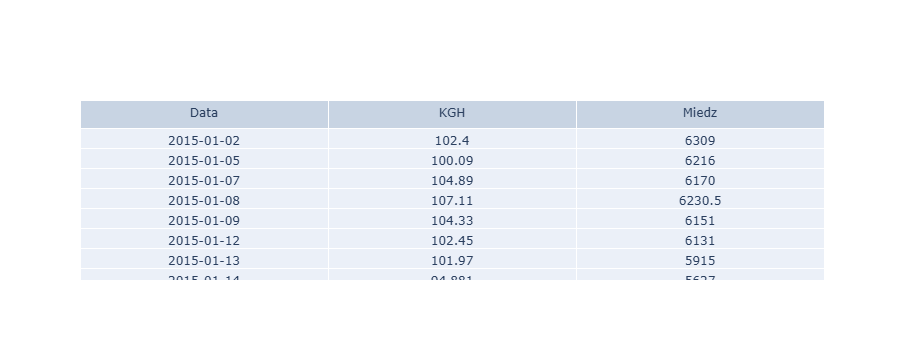

In [181]:
# Create the table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Data', 'KGH', 'Miedz']),
    cells=dict(values=[
        df_joint['Data'], 
        df_joint['Zamkniecie_kgh'], 
        df_joint['Zamkniecie_Ca']
    ])
)])

# Display the table
fig.show()